##### IMPORTS

In [93]:
import geopandas as gpd
import folium
import pandas as pd
from shapely.geometry import LineString
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import pandas as pd
# import numpy as np



import xml.etree.ElementTree as ET
import requests
from shapely.geometry import Point
import geopandas as gpd
import folium

import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString



## Plotting the Route using geojson

In [5]:

# Load the GeoJSON file
geojson_path = 'myrdal-flom.geojson'  # Replace with your file path
gdf = gpd.read_file(geojson_path)

# Find the center of the GeoDataFrame for centering the Folium map
center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]

# Create a Folium map centered around the route
m = folium.Map(location=center, zoom_start=12)

# Add the GeoJSON layer to the map
folium.GeoJson(
    gdf,
    name="Myrdal-Flåm Railway Route"
).add_to(m)

# Display the map in Jupyter Notebook or save as HTML
m
# m.save("myrdal_flom_route_map.html")  # Uncomment to save as an HTML file


/var/folders/vm/b0fhnhlx5475lzf84vzskvxm0000gn/T/ipykernel_96555/3838548413.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]


### Getting the coordinates every 5 meter along the route

This is already done and the result file is formatted so it matches the data from Roger1000 (start/end coordinates not synced before).
This is done to compensate for the lack of positional data gathered by roger1000 when inside tunnels. 

In [ ]:


# # Load the GeoJSON file
# geojson_path = '../Prosjektoppgave/myrdal-flom.geojson'  # Replace with your file path
# gdf = gpd.read_file(geojson_path)

# # Check the CRS (Coordinate Reference System) and reproject if necessary
# if gdf.crs.is_geographic:  # If the CRS is geographic (e.g., WGS84), reproject to a projected CRS
#     gdf = gdf.to_crs(epsg=32633)  # UTM zone 33N, suitable for Norway

# # Assuming there's only one route LineString in the GeoDataFrame
# route_line = gdf.geometry.iloc[0]  # Adjust if there are multiple features

# # Verify that the geometry is a LineString
# if isinstance(route_line, LineString):
#     # Set the interval distance in meters
#     interval_distance = 5

#     # Interpolate points every 5 meters along the route
#     points = []
#     distance = 0
#     while distance < route_line.length:
#         point = route_line.interpolate(distance)
#         # Transform back to geographic coordinates if necessary
#         if gdf.crs.is_geographic == False:
#             point = gpd.GeoSeries([point], crs=gdf.crs).to_crs(epsg=4326).geometry[0]  # WGS84 for GPS coordinates
#         points.append((point.y, point.x))
#         distance += interval_distance

#     # Save the coordinates to a DataFrame and export
#     points_df = pd.DataFrame(points, columns=["latitude", "longitude"])
#     points_df.to_csv("myrdal_flom_route_5m_intervals.csv", index=False)

#     print("Coordinates saved to myrdal_flom_route_5m_intervals.csv")

# else:
#     print("The geometry is not a LineString. Please check the GeoDataFrame contents.")


#### We add KM to this dataset so we can merge with the roger1000 wear data later

In [ ]:

# # Load the existing CSV file
# points_df = pd.read_csv("myrdal_flom_route_5m_intervals.csv")

# # Add the KM column, starting at 335845 and incrementing by 5 for each row
# start_km = 335845
# points_df['KM'] = [start_km + i * 5 for i in range(len(points_df))]

# points_df = points_df[['KM', 'latitude', 'longitude']]

# points_df.head()

# # Save the updated DataFrame back to CSV
# points_df.to_csv("myrdal_flom_route_5m_intervals_with_km.csv", index=False)

# print("Updated file saved as myrdal_flom_route_5m_intervals_with_km.csv")


#### Plot the resultfile which now includes KM

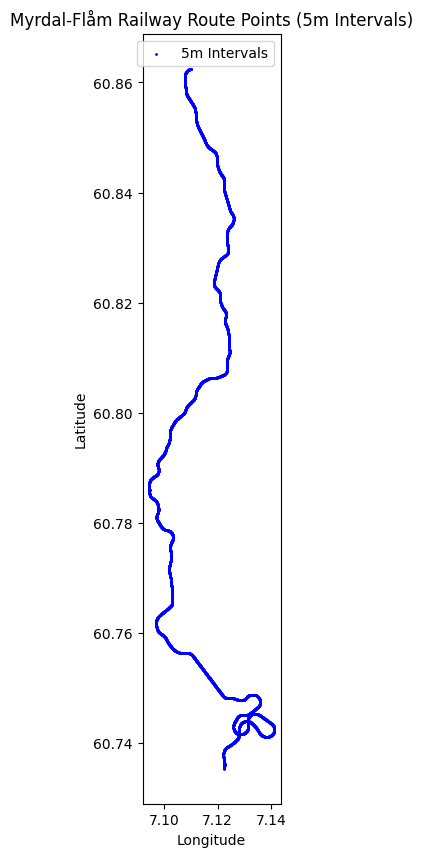

In [8]:


# Load the CSV file
points_df = pd.read_csv("Koordinater/myrdal_flom_route_5m_intervals_with_km.csv")

#Create a GeoDataFrame from the CSV data
geometry = [Point(xy) for xy in zip(points_df['longitude'], points_df['latitude'])]
gdf_points = gpd.GeoDataFrame(points_df, geometry=geometry)

# Set the coordinate reference system to WGS84 (EPSG:4326)
gdf_points.set_crs(epsg=4326, inplace=True)

# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
gdf_points.plot(ax=ax, markersize=1, color='blue', label='5m Intervals')

# Customize the plot
ax.set_title("Myrdal-Flåm Railway Route Points (5m Intervals)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()
plt.show()


## We will explore some of the data gathered by ROGER1000

### Start by loading the excel sheet

In [11]:

# Load the spreadsheet to see its structure
file_path = 'Data/Flåm - Roger1000_data.xlsx'
xls = pd.ExcelFile(file_path)

print(xls.sheet_names)
# Display sheet names to understand the structure


['2021 06 03', '2021 09 09', '2023 05 11', '2024 06 06', '2024 09 04', 'Summary of data', 'Stasjon og Koordinater']


### Load the data from 21 06 03 that contains coordinates and plot the "trasé" and stations.


Index(['Stasjoner', 'Latitude', 'Longitude'], dtype='object')


/var/folders/vm/b0fhnhlx5475lzf84vzskvxm0000gn/T/ipykernel_96555/4100629998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_06_03_clean['KM'] = (df_2021_06_03_clean['Km'] * 1000).astype(int)
/var/folders/vm/b0fhnhlx5475lzf84vzskvxm0000gn/T/ipykernel_96555/4100629998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_06_03_clean.drop(columns=['Km'], inplace=True)


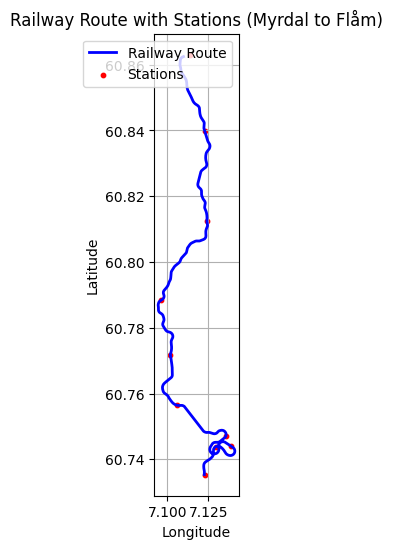

In [12]:
# Load the specific sheet "2021 06 03" to explore the data that contains both km and coordinates
df_2021_06_03 = pd.read_excel(xls, sheet_name='2021 06 03')

df_2021_06_03_clean = df_2021_06_03.dropna(how='all') # Remove rows with all NaN values
# Remove "," from the KM column and convert to integer
df_2021_06_03_clean['KM'] = (df_2021_06_03_clean['Km'] * 1000).astype(int)
df_2021_06_03_clean.drop(columns=['Km'], inplace=True)

# merge with myrdal_flom_route_5m_intervals_with_km.csv to get coordinates where it is missing in the original data sheet
df_2021_06_03_clean = df_2021_06_03_clean.merge(points_df, on='KM', how='left')


# Load the sheet "Stasjon og Koordinater" to explore the station data
df_stations = pd.read_excel(xls, sheet_name='Stasjon og Koordinater')




df_2021_06_03_clean.drop(columns=['SurveyID'], inplace=True)

df_2021_06_03_clean.to_csv('Data/datasheets_cleaned/2021_06_03.csv', index=False)

print(df_stations.columns)


# Fjern rader med manglende verdier i Latitude og Longitude
df_stations_clean = df_stations.dropna(subset=['Latitude', 'Longitude'])

# Plot the railway route and stations
plt.figure(figsize=(10, 6))
plt.plot(df_2021_06_03_clean['longitude'], df_2021_06_03_clean['latitude'], label="Railway Route", color='blue', linewidth=2)
plt.scatter(df_stations_clean['Longitude'], df_stations_clean['Latitude'], color='red', label='Stations', s=10)

# # Annotate the stations
# for index, row in df_stations_clean.iterrows():
#     plt.text(row['Longitude'], row['Latitude'], row['Stasjoner'], fontsize=9, verticalalignment='bottom')

plt.title('Railway Route with Stations (Myrdal to Flåm)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

# Set the aspect ratio to stretch latitude more and compact longitude
plt.gca().set_aspect(2)  # Adjust the value as needed for your visualization preference

plt.show()





### Since we only have coordinates in one of the sheets, use it to map coordinates to the KM-number we have in every dataset

In [4]:

# # Extract the coordinates and km values from the cleaned dataframe
# coordinates_KM = df_2021_06_03[['Km', 'Latitude', 'Longitude']].copy()

# # Remove rows with missing values in Latitude and Longitude
# coordinates_KM = coordinates_KM.dropna(subset=['Km','Latitude', 'Longitude'])

# # Use a regex to replace any pattern resembling '--' in Latitude and Longitude with NaN
# coordinates_KM['Latitude'] = coordinates_KM['Latitude'].replace(to_replace=r'--.*', value=np.nan, regex=True)
# coordinates_KM['Longitude'] = coordinates_KM['Longitude'].replace(to_replace=r'--.*', value=np.nan, regex=True)

# # Remove '° N' from Latitude and '° E' from Longitude, then strip any extra spaces
# coordinates_KM['Latitude'] = coordinates_KM['Latitude'].str.replace('° N', '').str.strip()
# coordinates_KM['Longitude'] = coordinates_KM['Longitude'].str.replace('° E', '').str.strip()


# # Convert Latitude and Longitude to float
# # Convert Latitude and Longitude to numeric, errors='coerce' will convert invalid data to NaN
# coordinates_KM['Latitude'] = pd.to_numeric(coordinates_KM['Latitude'], errors='coerce')
# coordinates_KM['Longitude'] = pd.to_numeric(coordinates_KM['Longitude'], errors='coerce')


# # Interpolate the missing values in Latitude and Longitude
# coordinates_KM['Latitude'] = coordinates_KM['Latitude'].interpolate(method='linear')
# coordinates_KM['Longitude'] = coordinates_KM['Longitude'].interpolate(method='linear')

# # Check for missing values
# print(coordinates_KM.isna().sum())

# # # Save the interpolated coordinates and km values to a CSV file
# coordinates_KM.to_csv('Data/coordinates_km_interpolated.csv', index=False)

# # Check the result
# print(coordinates_KM.head())





### Now we can study the wear on different areas of the route, and see if it is correlated to the stations in any way Inshallah

In [5]:

# # Load the data
# df_stations = pd.read_excel(file_path, sheet_name='Stasjon og Koordinater')
# interpolated_coordinates = pd.read_csv('Data/coordinates_km_interpolated.csv')

# df_2021_06_03_clean.drop(columns=['Latitude', 'Longitude'], inplace=True)
# # Merge the dataset containing wear data with the coordinates and km values 
# map_data = pd.merge(df_2021_06_03_clean, interpolated_coordinates, on='Km')

# #map_data = map_data.drop(columns=['SurveyID'])

# # save map_data to a csv file
# map_data.to_csv('Data/map_data.csv', index=False)


## Save the different sheets with the columns we want

### June21

In [36]:
june_2021 = pd.read_excel(xls, sheet_name='2021 06 03')

new_coordinates = pd.read_csv('Koordinater/myrdal_flom_route_5m_intervals_with_km.csv')

june_2021_cleaned = june_2021.dropna(how='all') # Remove rows with all NaN values


june_2021_cleaned.drop(columns=['SurveyID', 'Latitude', 'Longitude'], inplace=True)

june_2021_cleaned['KM'] = (june_2021_cleaned['Km'] * 1000).astype(int)
june_2021_cleaned.drop(columns=['Km'], inplace=True)

june_2021_cleaned = june_2021_cleaned.merge(new_coordinates, on='KM', how='left')

june_2021_cleaned.rename(columns={'latitude': 'Latitude', 'longitude': 'Longitude'}, inplace=True)
# new order of columns
june_2021_cleaned = june_2021_cleaned[['KM', 'Latitude', 'Longitude', 'RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']]

june_2021_cleaned.head()

june_2021_cleaned.to_csv('Data/datasheets_cleaned/2021_06_03.csv', index=False)



/var/folders/vm/b0fhnhlx5475lzf84vzskvxm0000gn/T/ipykernel_96555/1940709821.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_2021_cleaned.drop(columns=['SurveyID', 'Latitude', 'Longitude'], inplace=True)
/var/folders/vm/b0fhnhlx5475lzf84vzskvxm0000gn/T/ipykernel_96555/1940709821.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_2021_cleaned['KM'] = (june_2021_cleaned['Km'] * 1000).astype(int)
/var/folders/vm/b0fhnhlx5475lzf84vzskvxm0000gn/T/ipykernel_96555/1940709821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

## september21

Inneholder også Curvature and Gauge

In [51]:
sept_2021 = pd.read_excel(xls, sheet_name='2021 09 09')

sept_2021_cleaned = sept_2021.dropna(how='all') # Remove rows with all NaN values

sept_2021_cleaned.drop(columns=['SurveyID', 'Curvature', 'Gauge','RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption' , 'RX_VerticalWear', 'LX_VerticalWear', 'Km' ], inplace=True)

sept_2021_cleaned['KM'] = (sept_2021_cleaned['Km2'] * 1000 ).astype(int)
sept_2021_cleaned.drop(columns=['Km2'], inplace=True)

sept_2021_cleaned = sept_2021_cleaned.merge(new_coordinates, on='KM', how='left')

sept_2021_cleaned.rename(columns={'latitude': 'Latitude', 'longitude': 'Longitude',
                                   'RX_HorizontalWearConsumption2': 'RX_HorizontalWearConsumption',
                                   'LX_HorizontalWearConsumption2': 'LX_HorizontalWearConsumption', 
                                   'RX_VerticalWear2': 'RX_VerticalWear', 
                                   'LX_VerticalWear2': 'LX_VerticalWear'}, inplace=True)

sept_2021_cleaned = sept_2021_cleaned[['KM', 'Latitude', 'Longitude', 'RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']]
sept_2021_cleaned.head(10)

sept_2021_cleaned.to_csv('Data/datasheets_cleaned/2021_09_09.csv', index=False)


/var/folders/vm/b0fhnhlx5475lzf84vzskvxm0000gn/T/ipykernel_96555/1343394393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sept_2021_cleaned.drop(columns=['SurveyID', 'Curvature', 'Gauge','RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption' , 'RX_VerticalWear', 'LX_VerticalWear', 'Km' ], inplace=True)
/var/folders/vm/b0fhnhlx5475lzf84vzskvxm0000gn/T/ipykernel_96555/1343394393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sept_2021_cleaned['KM'] = (sept_2021_cleaned['Km2'] * 1000 ).astype(int)
/var/folders/vm/b0fhnhlx5475lzf84vzskvxm0000gn/T/i

## may 2023

In [88]:
may_2023 = pd.read_excel(xls, sheet_name='2023 05 11')

may_2023_cleaned = may_2023.dropna(how='all') # Remove rows with all NaN values

may_2023_cleaned.drop(columns=['SurveyID', 'RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption' , 'RX_VerticalWear', 'LX_VerticalWear', 'Km' ], inplace=True)

may_2023_cleaned['KM'] = (may_2023_cleaned['Km2'] * 1000 ).astype(int)
may_2023_cleaned.drop(columns=['Km2'], inplace=True)

may_2023_cleaned = may_2023_cleaned.merge(new_coordinates, on='KM', how='left')

may_2023_cleaned.rename(columns={'latitude': 'Latitude', 'longitude': 'Longitude',
                                      'RX_HorizontalWearConsumption3': 'RX_HorizontalWearConsumption',
                                      'LX_HorizontalWearConsumption4': 'LX_HorizontalWearConsumption', 
                                      'RX_VerticalWear5': 'RX_VerticalWear', 
                                      'LX_VerticalWear6': 'LX_VerticalWear'}, inplace=True) 

may_2023_cleaned = may_2023_cleaned[['KM', 'Latitude', 'Longitude', 'RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']]

#Siste raden fjernes, den er feil
may_2023_cleaned = may_2023_cleaned.iloc[:-1]

may_2023_cleaned.to_csv('Data/datasheets_cleaned/2023_05_11.csv', index=False)



## june 2024

In [64]:
june_2024 = pd.read_excel(xls, sheet_name='2024 06 06')

june_2024_cleaned = june_2024.dropna(how='all') # Remove rows with all NaN values

june_2024_cleaned = june_2024_cleaned[[ 'Km', 'RX_HorizontalWearConsumption3', 'LX_HorizontalWearConsumption4', 'RX_VerticalWear5', 'LX_VerticalWear6']]


june_2024_cleaned = june_2024_cleaned[june_2024_cleaned['Km']*1000 % 5 == 0]

june_2024_cleaned['KM'] = (june_2024_cleaned['Km'] * 1000 ).astype(int)
june_2024_cleaned.drop(columns=['Km'], inplace=True)

june_2024_cleaned = june_2024_cleaned.merge(new_coordinates, on='KM', how='inner')

june_2024_cleaned.rename(columns={'latitude': 'Latitude', 'longitude': 'Longitude',
                                      'RX_HorizontalWearConsumption3': 'RX_HorizontalWearConsumption',
                                      'LX_HorizontalWearConsumption4': 'LX_HorizontalWearConsumption', 
                                      'RX_VerticalWear5': 'RX_VerticalWear', 
                                      'LX_VerticalWear6': 'LX_VerticalWear'}, inplace=True) 

june_2024_cleaned = june_2024_cleaned[['KM', 'Latitude', 'Longitude', 'RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']]
june_2024_cleaned.head(10)



## september 2024

In [75]:
sept_2024 = pd.read_excel(xls, sheet_name='2024 09 04', header=1)

sept_2024_cleaned = sept_2024.dropna(how='all') # Remove rows with all NaN values

sept_2024_cleaned = sept_2024_cleaned.iloc[::-1]. reset_index(drop=True)

sept_2024_cleaned = sept_2024_cleaned[[ 'Km', 'RX_HorizontalWearConsumption3', 'LX_HorizontalWearConsumption4', 'RX_VerticalWear5', 'LX_VerticalWear6']]


sept_2024_cleaned = sept_2024_cleaned[sept_2024_cleaned['Km']*1000 % 5 == 0]

sept_2024_cleaned['KM'] = (sept_2024_cleaned['Km'] * 1000 ).astype(int)
sept_2024_cleaned.drop(columns=['Km'], inplace=True)

sept_2024_cleaned = sept_2024_cleaned.merge(new_coordinates, on='KM', how='inner')

sept_2024_cleaned.rename(columns={'latitude': 'Latitude', 'longitude': 'Longitude',
                                      'RX_HorizontalWearConsumption3': 'RX_HorizontalWearConsumption',
                                      'LX_HorizontalWearConsumption4': 'LX_HorizontalWearConsumption', 
                                      'RX_VerticalWear5': 'RX_VerticalWear', 
                                      'LX_VerticalWear6': 'LX_VerticalWear'}, inplace=True) 

sept_2024_cleaned = sept_2024_cleaned[['KM', 'Latitude', 'Longitude', 'RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']]
sept_2024_cleaned.head(10)

sept_2024_cleaned.to_csv('Data/datasheets_cleaned/2024_09_04.csv', index=False)

### Plotting wear June 21

RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
Latitude                        0
Longitude                       0
dtype: int64
RX_HorizontalWearConsumption    9.25
LX_HorizontalWearConsumption    7.40
RX_VerticalWear                 3.00
LX_VerticalWear                 2.94
dtype: float64
RX_HorizontalWearConsumption    -3.02
LX_HorizontalWearConsumption    -2.39
RX_VerticalWear                -13.66
LX_VerticalWear                -13.54
dtype: float64
RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
dtype: int64


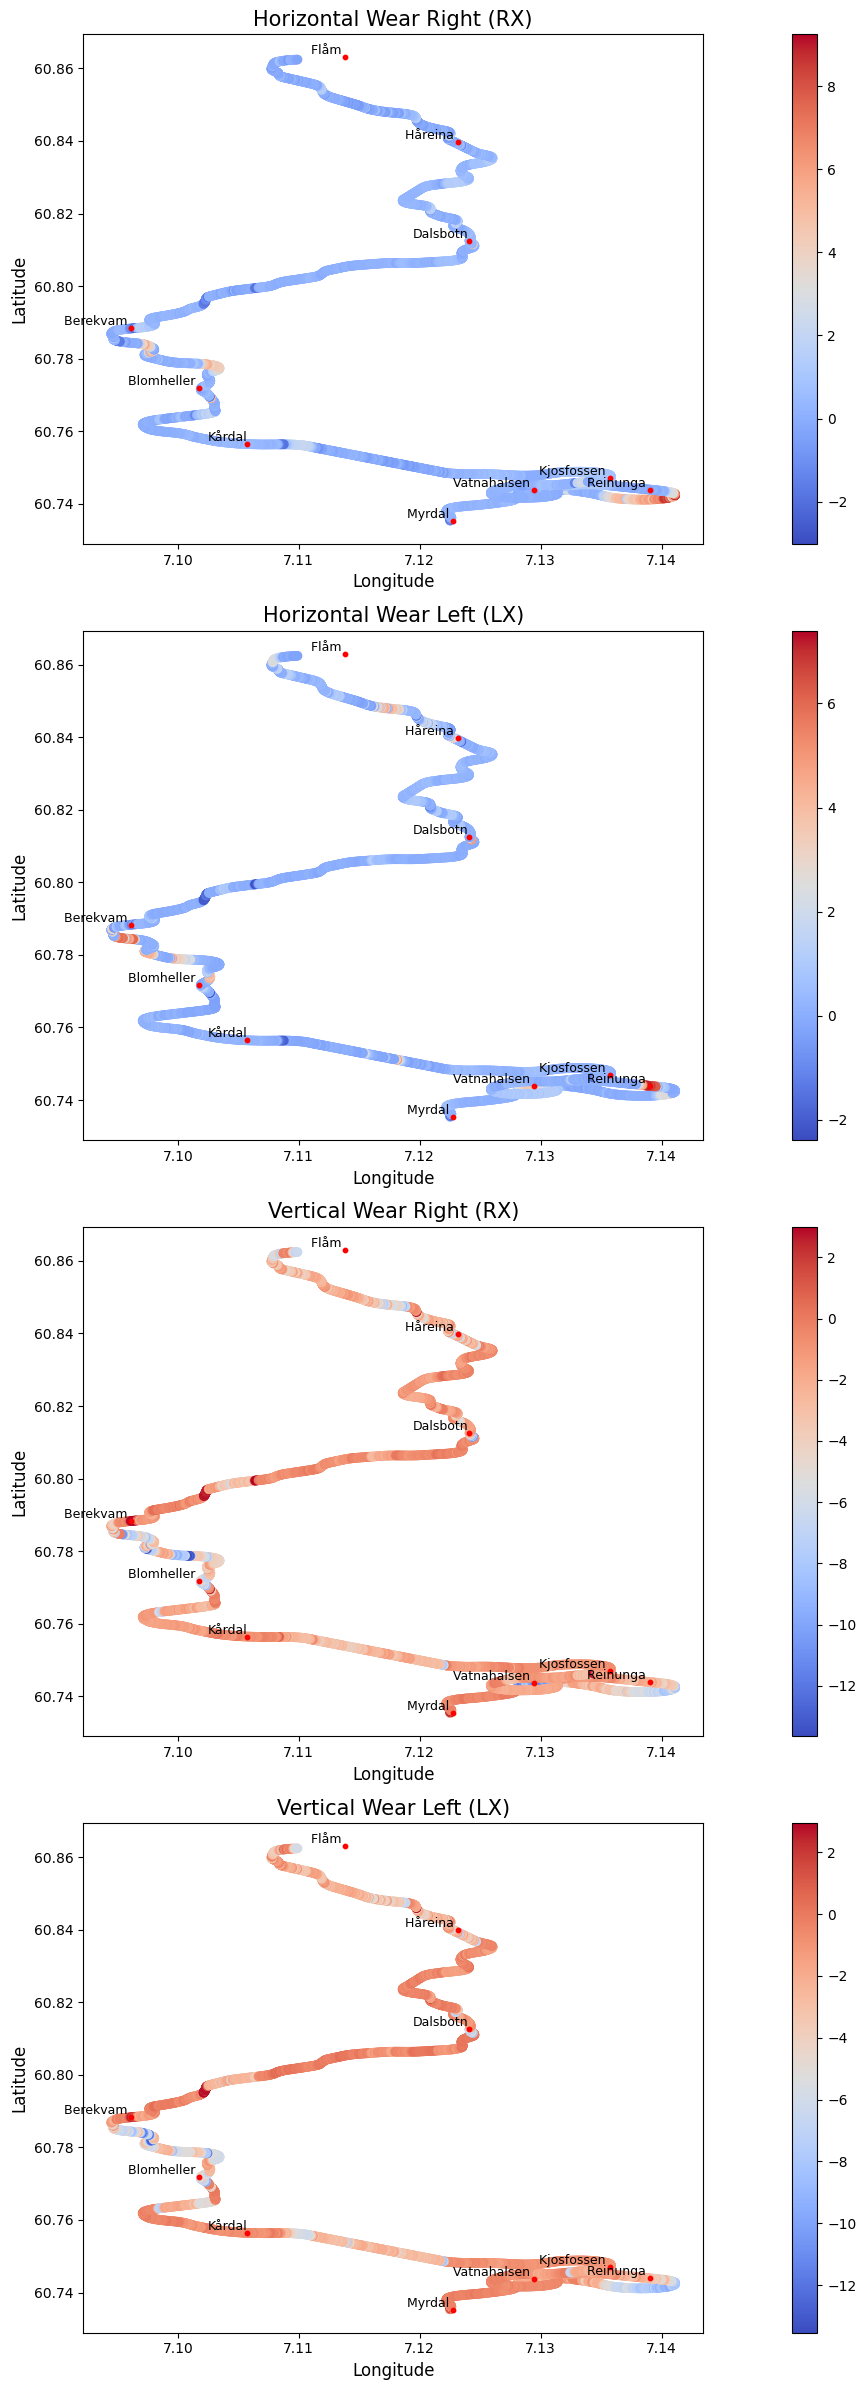

In [102]:

map_data = pd.read_csv('Data/datasheets_cleaned/2021_06_03.csv')
# Check for any remaining missing wear data
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear', 'Latitude', 'Longitude']].isna().sum())

map_data = map_data.sort_values(by='KM')

## Print the max and min values for each wear type

print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].max())
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].min())




print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].isna().sum())

# Create a GeoDataFrame for the slitasjedata
geometry = [Point(xy) for xy in zip(map_data['Longitude'], map_data['Latitude'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

def plot_wear_metrics(gdf, stations_gdf, aspect_ratio=0.3):
    # Increase figure size for readability
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearConsumption', 'Horizontal Wear Right (RX)'),
        ('LX_HorizontalWearConsumption', 'Horizontal Wear Left (LX)'),
        ('RX_VerticalWear', 'Vertical Wear Right (RX)'),
        ('LX_VerticalWear', 'Vertical Wear Left (LX)')
    ]
    
    for i, (column, title) in enumerate(metrics):
        gdf.plot(column=column, cmap='coolwarm', legend=True, ax=ax[i])
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_wear_metrics(gdf, df_stations_clean)


### Plotting wear september 2021

RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
Latitude                        1
Longitude                       1
dtype: int64
RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
dtype: int64
RX_HorizontalWearConsumption    9.19
LX_HorizontalWearConsumption    7.25
RX_VerticalWear                 3.00
LX_VerticalWear                 3.00
dtype: float64
RX_HorizontalWearConsumption    -2.59
LX_HorizontalWearConsumption    -2.43
RX_VerticalWear                -13.88
LX_VerticalWear                -13.32
dtype: float64


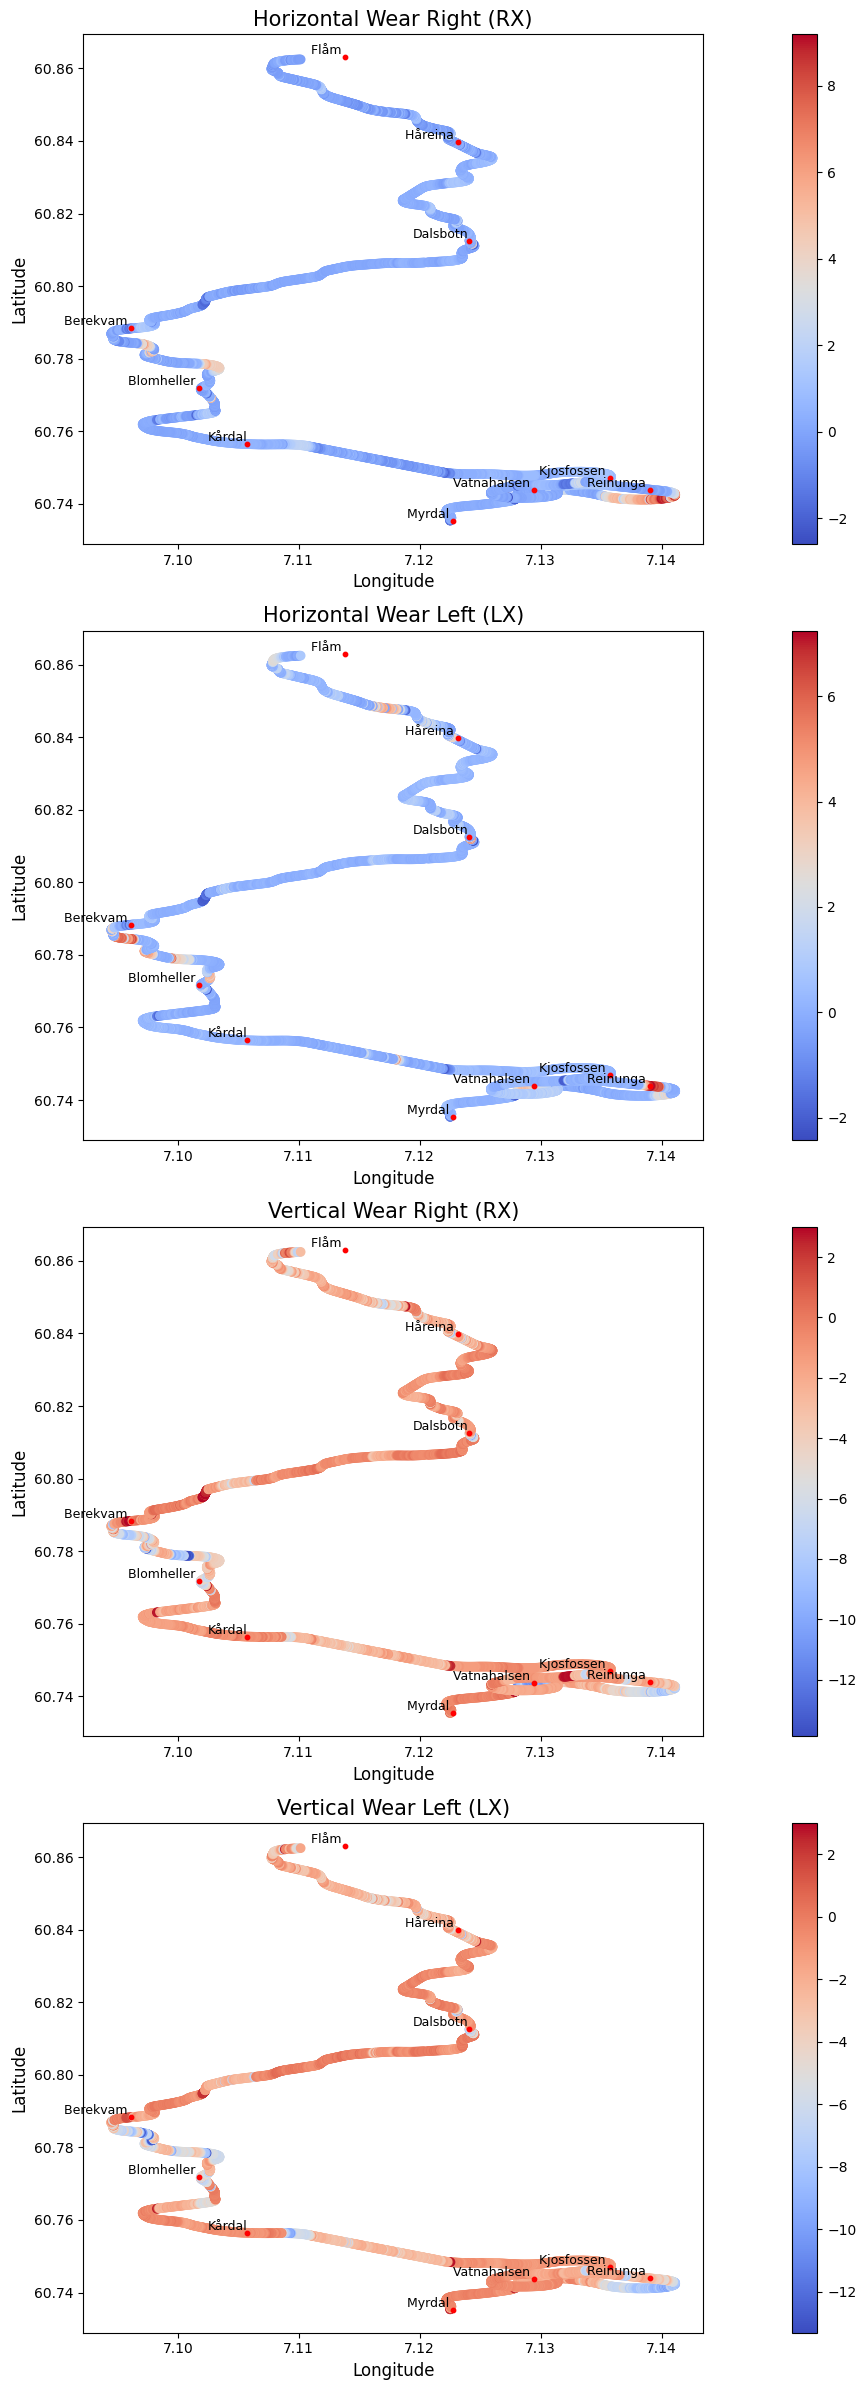

In [103]:

map_data = pd.read_csv('Data/datasheets_cleaned/2021_09_09.csv')
# Check for any remaining missing wear data
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear', 'Latitude', 'Longitude']].isna().sum())

map_data = map_data.sort_values(by='KM')



print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].isna().sum())


print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].max())
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].min())


# Create a GeoDataFrame for the slitasjedata
geometry = [Point(xy) for xy in zip(map_data['Longitude'], map_data['Latitude'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

def plot_wear_metrics(gdf, stations_gdf, aspect_ratio=0.3):
    # Increase figure size for readability
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearConsumption', 'Horizontal Wear Right (RX)'),
        ('LX_HorizontalWearConsumption', 'Horizontal Wear Left (LX)'),
        ('RX_VerticalWear', 'Vertical Wear Right (RX)'),
        ('LX_VerticalWear', 'Vertical Wear Left (LX)')
    ]
    
    for i, (column, title) in enumerate(metrics):
        gdf.plot(column=column, cmap='coolwarm', legend=True, ax=ax[i])
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_wear_metrics(gdf, df_stations_clean)


### Plotting wearrate may 2023

RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
Latitude                        0
Longitude                       0
dtype: int64
RX_HorizontalWearConsumption    9.19
LX_HorizontalWearConsumption    8.21
RX_VerticalWear                 1.41
LX_VerticalWear                 1.28
dtype: float64
RX_HorizontalWearConsumption    -4.96
LX_HorizontalWearConsumption    -4.92
RX_VerticalWear                -11.46
LX_VerticalWear                 -9.71
dtype: float64
RX_HorizontalWearConsumption    0
LX_HorizontalWearConsumption    0
RX_VerticalWear                 0
LX_VerticalWear                 0
dtype: int64


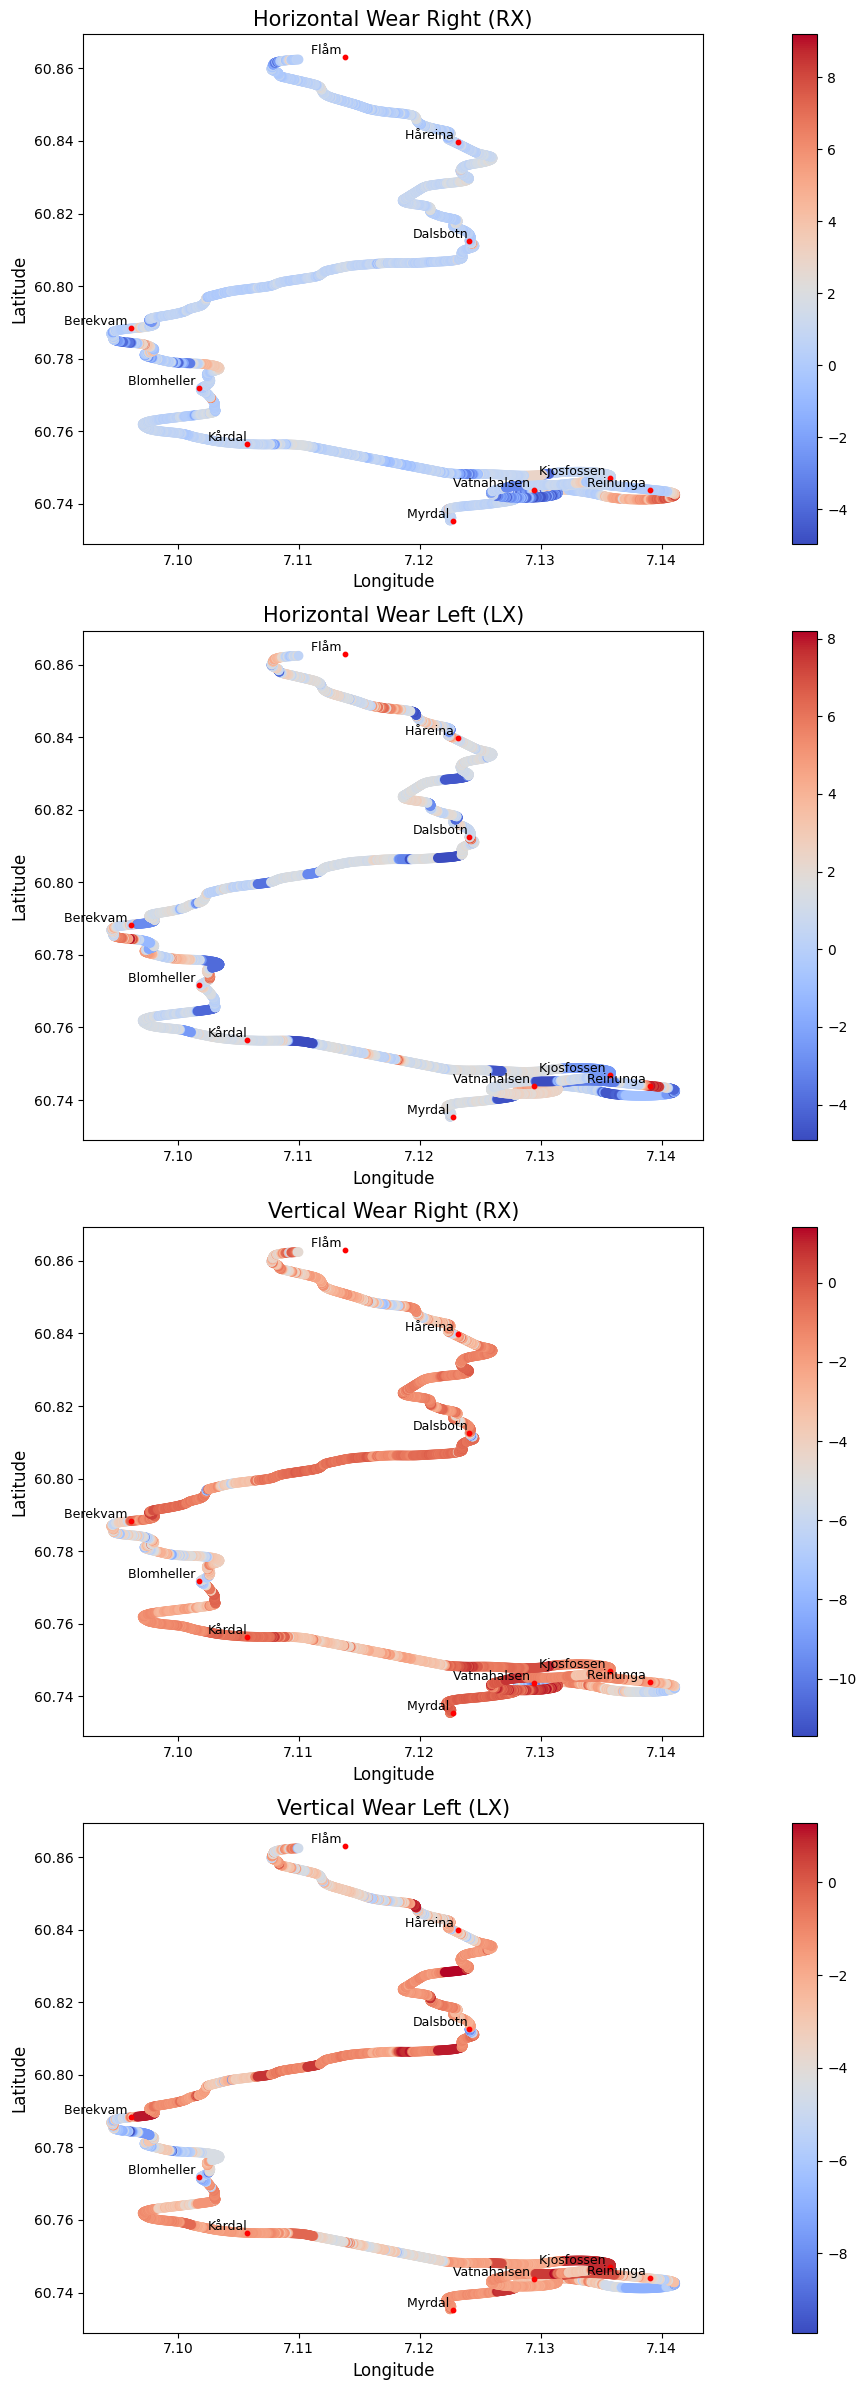

In [104]:

map_data = pd.read_csv('Data/datasheets_cleaned/2023_05_11.csv')
# Check for any remaining missing wear data
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear', 'Latitude', 'Longitude']].isna().sum())

map_data = map_data.sort_values(by='KM')


print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].max())
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].min())



print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].isna().sum())

# Create a GeoDataFrame for the slitasjedata
geometry = [Point(xy) for xy in zip(map_data['Longitude'], map_data['Latitude'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

def plot_wear_metrics(gdf, stations_gdf, aspect_ratio=0.3):
    # Increase figure size for readability
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearConsumption', 'Horizontal Wear Right (RX)'),
        ('LX_HorizontalWearConsumption', 'Horizontal Wear Left (LX)'),
        ('RX_VerticalWear', 'Vertical Wear Right (RX)'),
        ('LX_VerticalWear', 'Vertical Wear Left (LX)')
    ]
    
    for i, (column, title) in enumerate(metrics):
        gdf.plot(column=column, cmap='coolwarm', legend=True, ax=ax[i])
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_wear_metrics(gdf, df_stations_clean)


### Plotte Juni 2024

In [ ]:

map_data = pd.read_csv('Data/datasheets_cleaned/2024_06_06.csv')


map_data = map_data.sort_values(by='KM')


# Change NV to NaN
map_data = map_data.replace('NV', np.nan)

# remove rows with missing values
map_data = map_data.dropna(subset=['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear'])


print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].max())
print(map_data[['RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']].min())


# Create a GeoDataFrame for the slitasjedata
geometry = [Point(xy) for xy in zip(map_data['Longitude'], map_data['Latitude'])]
gdf = gpd.GeoDataFrame(map_data, geometry=geometry)

def plot_wear_metrics(gdf, stations_gdf, aspect_ratio=0.3):
    # Increase figure size for readability
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearConsumption', 'Horizontal Wear Right (RX)'),
        ('LX_HorizontalWearConsumption', 'Horizontal Wear Left (LX)'),
        ('RX_VerticalWear', 'Vertical Wear Right (RX)'),
        ('LX_VerticalWear', 'Vertical Wear Left (LX)')
    ]
    
    for i, (column, title) in enumerate(metrics):
        gdf.plot(column=column, cmap='coolwarm', legend=True, ax=ax[i])
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_wear_metrics(gdf, df_stations_clean)


Nice, we now have a continous plot 

## Wear Rate between June 2021 and September 2021

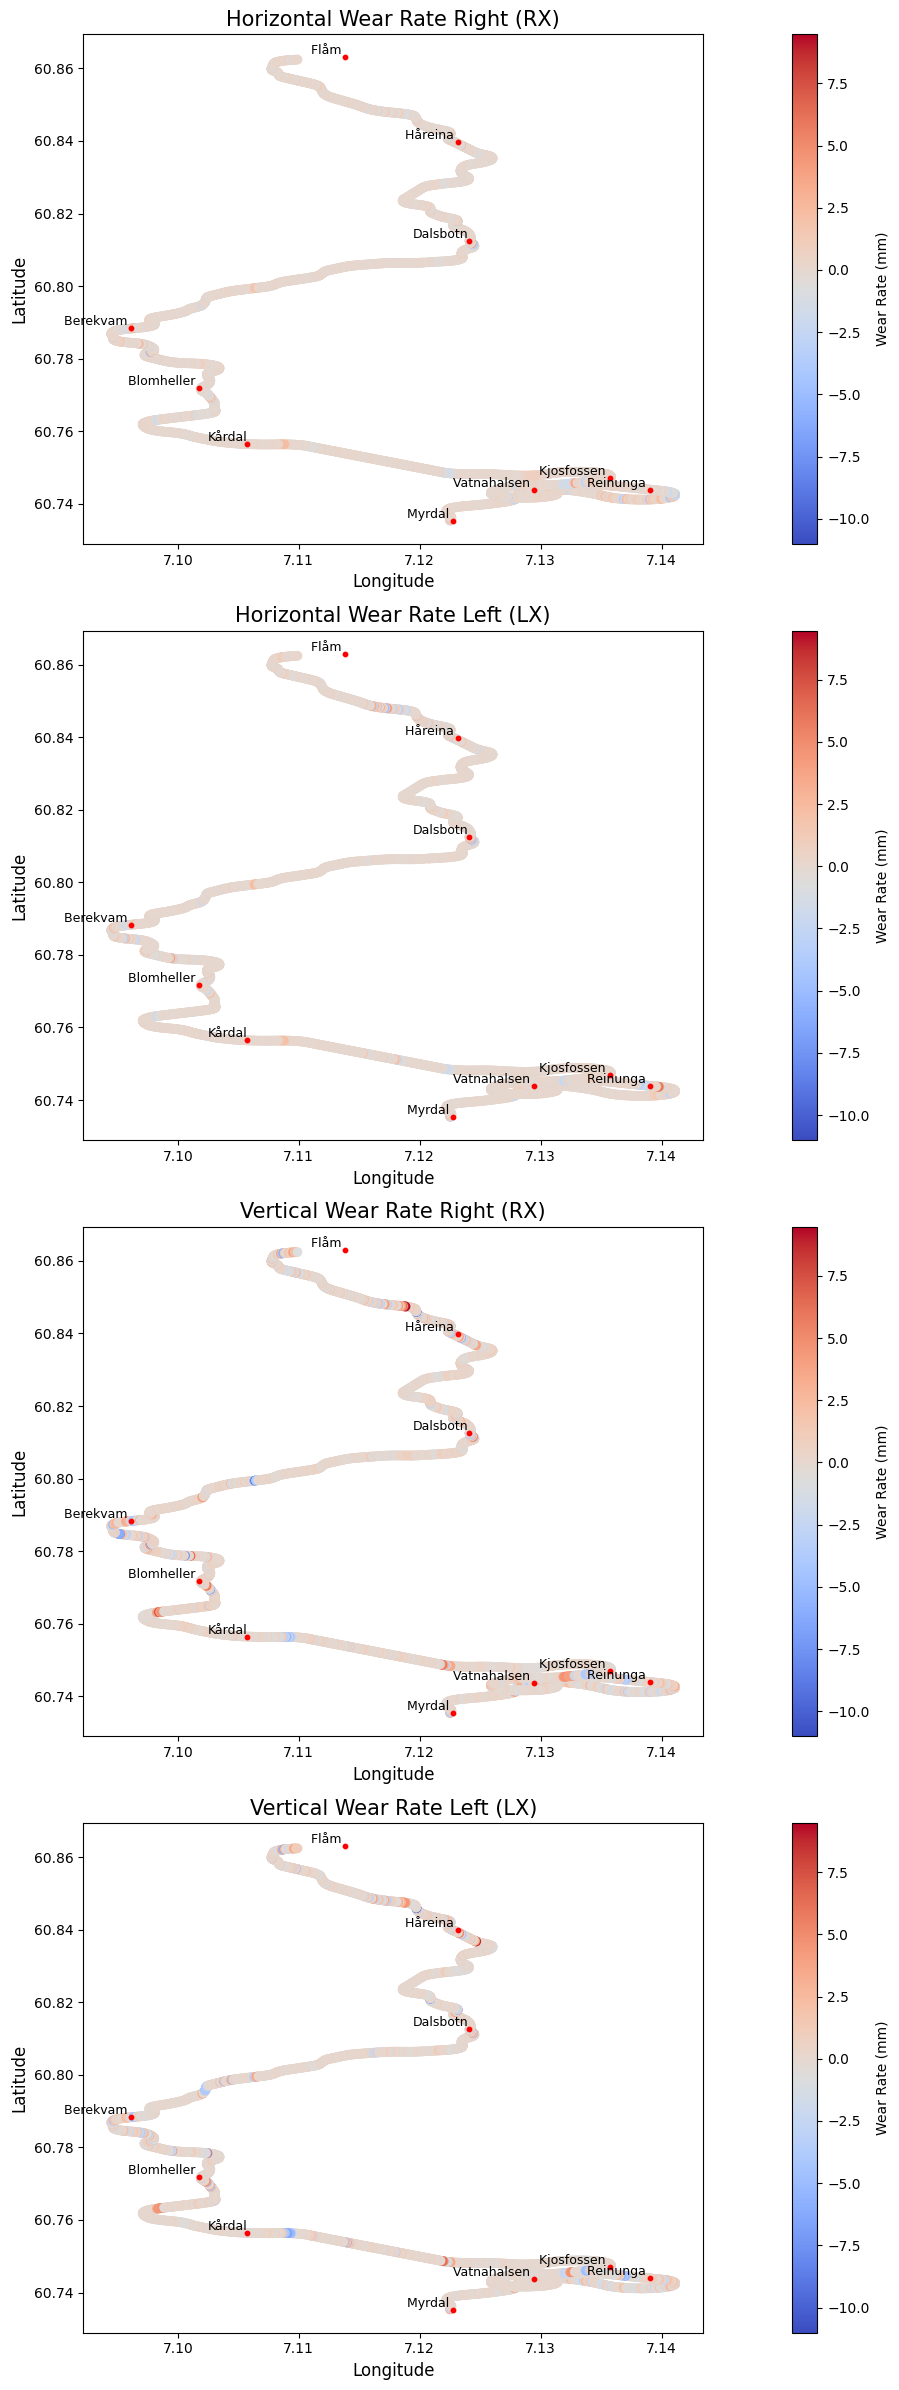

In [125]:
# Load the datasets
june_2021 = pd.read_csv('Data/datasheets_cleaned/2021_06_03.csv')
september_2021 = pd.read_csv('Data/datasheets_cleaned/2021_09_09.csv')

# Ensure data is sorted by KM for consistency
june_2021 = june_2021.sort_values(by='KM')
september_2021 = september_2021.sort_values(by='KM')

# Merge the datasets on KM
merged_data = pd.merge(june_2021, september_2021, on='KM', suffixes=('_june', '_september'))

# Calculate wear rate for each metric
merged_data['RX_HorizontalWearRate'] = merged_data['RX_HorizontalWearConsumption_september'] - merged_data['RX_HorizontalWearConsumption_june']
merged_data['LX_HorizontalWearRate'] = merged_data['LX_HorizontalWearConsumption_september'] - merged_data['LX_HorizontalWearConsumption_june']
merged_data['RX_VerticalWearRate'] = merged_data['RX_VerticalWear_september'] - merged_data['RX_VerticalWear_june']
merged_data['LX_VerticalWearRate'] = merged_data['LX_VerticalWear_september'] - merged_data['LX_VerticalWear_june']


# Create a GeoDataFrame for plotting
geometry = [Point(xy) for xy in zip(merged_data['Longitude_june'], merged_data['Latitude_june'])]
gdf_wear_rate = gpd.GeoDataFrame(merged_data, geometry=geometry)

# Create a GeoDataFrame for plotting
geometry = [Point(xy) for xy in zip(merged_data['Longitude_june'], merged_data['Latitude_june'])]
gdf_wear_rate = gpd.GeoDataFrame(merged_data, geometry=geometry)

def plot_wear_rate_adjusted(gdf, stations_gdf, vmin, vmax, aspect_ratio=0.3):
    fig, ax = plt.subplots(4, 1, figsize=(18, 24))
    
    metrics = [
        ('RX_HorizontalWearRate', 'Horizontal Wear Rate Right (RX)'),
        ('LX_HorizontalWearRate', 'Horizontal Wear Rate Left (LX)'),
        ('RX_VerticalWearRate', 'Vertical Wear Rate Right (RX)'),
        ('LX_VerticalWearRate', 'Vertical Wear Rate Left (LX)')
    ]
    
    # Use a diverging colormap with a midpoint at 0
    norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    sm = mpl.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    
    for i, (column, title) in enumerate(metrics):
        gdf.plot(
            column=column,
            cmap='coolwarm',
            ax=ax[i],
            norm=norm
        )
        ax[i].set_title(title, fontsize=15)
        ax[i].set_xlabel('Longitude', fontsize=12)
        ax[i].set_ylabel('Latitude', fontsize=12)
        ax[i].set_aspect(aspect_ratio)

        # Overlay stations
        ax[i].scatter(stations_gdf['Longitude'], stations_gdf['Latitude'], color='red', label='Stations', s=10)
        for _, station in stations_gdf.iterrows():
            ax[i].text(station['Longitude'], station['Latitude'], station['Stasjoner'], fontsize=9,
                       verticalalignment='bottom', horizontalalignment='right')

        # Add a custom colorbar for each subplot
        cbar = fig.colorbar(sm, ax=ax[i], orientation='vertical', shrink=0.8)
        cbar.set_label('Wear Rate (mm)', fontsize=12)
    
    plt.tight_layout()
    plt.show()

    
# Use adjusted percentiles for vmin and vmax
vmin = merged_data[['RX_HorizontalWearRate', 'LX_HorizontalWearRate', 
                    'RX_VerticalWearRate', 'LX_VerticalWearRate']].quantile(0.05).min()
vmax = merged_data[['RX_HorizontalWearRate', 'LX_HorizontalWearRate', 
                    'RX_VerticalWearRate', 'LX_VerticalWearRate']].quantile(0.95).max()

plot_wear_rate_adjusted(gdf_wear_rate, df_stations_clean, vmin, vmax)



### LAGRE ALLE SHEETS SOM EGNE FILER

FØRSTE OMGANG 2021 

In [7]:
# load interpolated coordinates
coordinates_km_interpolated = pd.read_csv('Data/coordinates_km_interpolated.csv')
coordinates_km_interpolated.columns = ['KM', 'Latitude', 'Longitude']
# Load the specific sheet "2021 09 09" to explore the data
df_2021_09_09 = pd.read_excel(xls, sheet_name='2021 09 09')

df_2021_09_09_clean = df_2021_09_09.dropna(how='all') # Remove rows with all NaN values

df_2021_09_09_clean = df_2021_09_09_clean.drop(columns=['SurveyID', 'Km', 'Curvature', 'Gauge', 'RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear'])

# Rename colums to match the previous dataframe
df_2021_09_09_clean.columns = ['KM', 'RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']
df_2021_09_09_clean_coordinates = pd.merge(df_2021_09_09_clean, coordinates_km_interpolated, on='KM')

#Order Columns to match the previous dataframe
new_order = ['KM', 'Latitude', 'Longitude', 'RX_HorizontalWearConsumption', 'LX_HorizontalWearConsumption', 'RX_VerticalWear', 'LX_VerticalWear']

df_2021_09_09_clean_coordinates = df_2021_09_09_clean_coordinates[new_order]

df_2021_09_09_clean_coordinates.head()
df_2021_09_09_clean_coordinates.to_csv('Data/datasheets_cleaned/2021_09_09.csv', index=False)





# Tidsutvikling av slitasje
## Trend over tid

Kan plotte slitasjeverdiene fra forskjellige tidspunkter på samme diagram, slik at vi kan se om det er noe økning eller reduksjon i slitasjerate på bestemte deler av sporet

HVa er det jeg ser på.



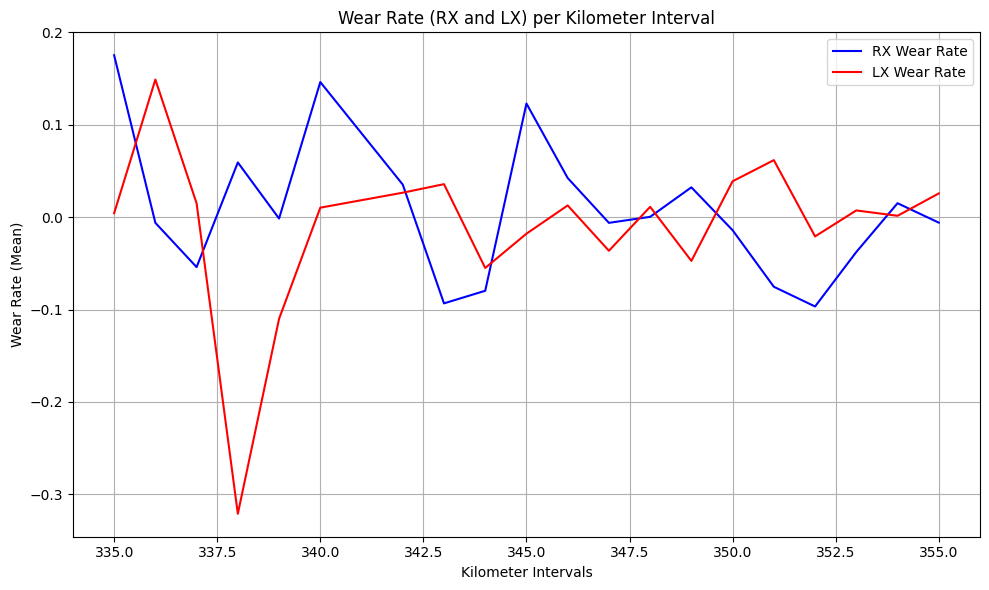

In [8]:
## Sammenligner data fra 2021_06_03 og 2021_09_09


# Last inn de to datasettene
df_2021_06_03 = pd.read_csv('Data/datasheets_cleaned/2021_06_03.csv')
df_2021_09_09 = pd.read_csv('Data/datasheets_cleaned/2021_09_09.csv')

# Endre kolonnenavn slik at de er like
df_2021_06_03.rename(columns={'Km': 'KM'}, inplace=True)

# Kombiner de to datasettene ved hjelp av KM (kilometer)
merged_data = pd.merge(df_2021_06_03, df_2021_09_09, on='KM', suffixes=('_0603', '_0909'))

# Beregn forskjellene i wear rate
merged_data['RX_Wear_Rate'] = merged_data['RX_HorizontalWearConsumption_0909'] - merged_data['RX_HorizontalWearConsumption_0603']
merged_data['LX_Wear_Rate'] = merged_data['LX_HorizontalWearConsumption_0909'] - merged_data['LX_HorizontalWearConsumption_0603']


# Definer kilometerintervaller
interval_size = 1  # Størrelsen på kilometerintervaller
merged_data['KM_Interval'] = (merged_data['KM'] // interval_size) * interval_size

# Beregn gjennomsnittlig slitasje per kilometerintervall
km_grouped_data = merged_data.groupby('KM_Interval').agg({
    'RX_Wear_Rate': 'mean',
    'LX_Wear_Rate': 'mean'
}).reset_index()


plt.figure(figsize=(10, 6))
plt.plot(km_grouped_data['KM_Interval'], km_grouped_data['RX_Wear_Rate'], label='RX Wear Rate', color='blue')
plt.plot(km_grouped_data['KM_Interval'], km_grouped_data['LX_Wear_Rate'], label='LX Wear Rate', color='red')

plt.title('Wear Rate (RX and LX) per Kilometer Interval')
plt.xlabel('Kilometer Intervals')
plt.ylabel('Wear Rate (Mean)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# # Bruk rullende gjennomsnitt for å glatte ut dataen
# merged_data['RX_Wear_Rate_Smoothed'] = merged_data['RX_Wear_Rate'].rolling(window=10, min_periods=1).mean()
# merged_data['LX_Wear_Rate_Smoothed'] = merged_data['LX_Wear_Rate'].rolling(window=10, min_periods=1).mean()

# # Plot RX og LX wear rate med rullende gjennomsnitt
# plt.figure(figsize=(10, 6))

# # Plot for smoothed RX
# plt.plot(merged_data['KM'], merged_data['RX_Wear_Rate_Smoothed'], label='Smoothed RX Wear Rate', color='blue')

# # Plot for smoothed LX
# plt.plot(merged_data['KM'], merged_data['LX_Wear_Rate_Smoothed'], label='Smoothed LX Wear Rate', color='red')

# # Tilpasse plottet
# plt.title('Change in Horizontal Wear (RX and LX) Between 2021-06-03 and 2021-09-09 (Smoothed)')
# plt.xlabel('KM')
# plt.ylabel('Wear Rate (difference)')
# plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Legg til en linje for null (ingen endring)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()




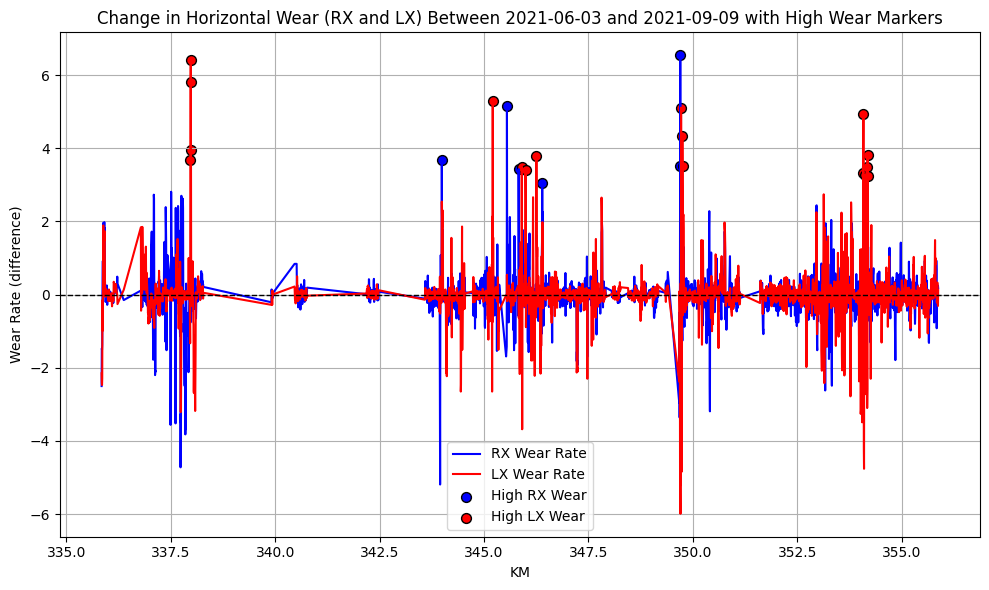

Kilometerintervaller med høy slitasje:
           KM  RX_Wear_Rate  LX_Wear_Rate   Latitude  Longitude
294   337.970         -0.48          3.69  60.743751   7.139513
295   337.975         -0.76          5.80  60.743777   7.139438
296   337.980         -0.29          6.41  60.743803   7.139363
297   337.985          0.07          3.95  60.743828   7.139287
563   343.990          3.67          2.54  60.769760   7.102521
768   345.210          0.29          5.30  60.779353   7.098981
802   345.550          5.16          0.54  60.782011   7.097971
848   345.830          3.43         -0.01  60.784352   7.096239
863   345.905         -0.56          3.49  60.784803   7.095158
881   345.995         -0.36          3.40  60.785541   7.094646
933   346.255          0.22          3.78  60.787840   7.094951
961   346.395          3.04          0.08  60.788609   7.096999
1459  349.700          6.54         -4.84  60.812249   7.124126
1460  349.705          3.51         -5.99  60.812304   7.124146
1

In [9]:

# Last inn de to datasettene
df_2021_06_03 = pd.read_csv('Data/datasheets_cleaned/2021_06_03.csv')
df_2021_09_09 = pd.read_csv('Data/datasheets_cleaned/2021_09_09.csv')

# Endre kolonnenavn slik at de er like
df_2021_06_03.rename(columns={'Km': 'KM'}, inplace=True)

# Kombiner de to datasettene ved hjelp av KM (kilometer)
merged_data = pd.merge(df_2021_06_03, df_2021_09_09, on=['KM', 'Latitude', 'Longitude'], suffixes=('_0603', '_0909'))

# Beregn forskjellene i wear rate
merged_data['RX_Wear_Rate'] = merged_data['RX_HorizontalWearConsumption_0909'] - merged_data['RX_HorizontalWearConsumption_0603']
merged_data['LX_Wear_Rate'] = merged_data['LX_HorizontalWearConsumption_0909'] - merged_data['LX_HorizontalWearConsumption_0603']

# Definer terskel for høy slitasje (for eksempel forskjeller større enn 3)
high_wear_threshold = 3

# Plot RX og LX wear rate med markering av høy slitasje
plt.figure(figsize=(10, 6))

# Plot RX Wear Rate
plt.plot(merged_data['KM'], merged_data['RX_Wear_Rate'], label='RX Wear Rate', color='blue')

# Plot LX Wear Rate
plt.plot(merged_data['KM'], merged_data['LX_Wear_Rate'], label='LX Wear Rate', color='red')

# Marker områder med høy slitasje
plt.scatter(merged_data['KM'][merged_data['RX_Wear_Rate'] > high_wear_threshold], 
            merged_data['RX_Wear_Rate'][merged_data['RX_Wear_Rate'] > high_wear_threshold], 
            color='blue', s=50, label='High RX Wear', edgecolor='black')

plt.scatter(merged_data['KM'][merged_data['LX_Wear_Rate'] > high_wear_threshold], 
            merged_data['LX_Wear_Rate'][merged_data['LX_Wear_Rate'] > high_wear_threshold], 
            color='red', s=50, label='High LX Wear', edgecolor='black')

# Tilpasse plottet
plt.title('Change in Horizontal Wear (RX and LX) Between 2021-06-03 and 2021-09-09 with High Wear Markers')
plt.xlabel('KM')
plt.ylabel('Wear Rate (difference)')
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Legg til en linje for null (ingen endring)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# Filtrer ut rader med høy slitasje for både RX og LX
high_wear_data = merged_data[(merged_data['RX_Wear_Rate'] > high_wear_threshold) | 
                             (merged_data['LX_Wear_Rate'] > high_wear_threshold)]

# Sorter etter KM for å se intervallene med høyest slitasje
high_wear_data_sorted = high_wear_data.sort_values(by='KM')

# Velg relevante kolonner for bedre oversikt
high_wear_intervals = high_wear_data_sorted[['KM', 'RX_Wear_Rate', 'LX_Wear_Rate', 'Latitude', 'Longitude']]

# Skriv ut resultatet
print("Kilometerintervaller med høy slitasje:")
print(high_wear_intervals)
